# Random Forest Model

Random Forest is a Supervised Machine Learning model that can be used for both Regression and Classification problems.  It is also considered as Ensemble Learning since Random Forest involves building multiple individual Decision Trees and consolidating their outputs to give the final prediction.

Some of the Key parameters that need to be determined while constructing a Random Forest model are:



*   k - The number of Features that should be Randomly selected to construct each Decision Tree
*   m - Total number of Features in the dataset
*   n - Number of individual Decision Trees

For this example, we will be using a dataset '[car_evaluation.csv](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)' sourced from Kaggle.

Would also like to acknowledge that some of the code flow is sourced from [Random Forest Classifier Tutorial](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set) by Prashant Banerjee on Kaggle website.

In [1]:
# prompt: Load packages required for building a Random Forest model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [20]:
# prompt: read 'car_evaluation.csv' file
# Load the dataset
data = pd.read_csv('car_evaluation.csv', header = None)
# Print some info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis (EDA)

Since our dataset does not have a Header row, we need to assign names to each column.

In [21]:
# prompt: Assign the column names as 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'

data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# prompt: Display unique values and counts for each column

for col in data.columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    print("-" * 20)

Column: buying
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------
Column: maint
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
--------------------
Column: doors
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
--------------------
Column: persons
persons
2       576
4       576
more    576
Name: count, dtype: int64
--------------------
Column: lug_boot
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
--------------------
Column: safety
safety
low     576
med     576
high    576
Name: count, dtype: int64
--------------------
Column: class
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
--------------------


Notice that there is a high count of class 'unacc', but very few cars belonging to class 'good' and 'vgood'.

## Split Data into train and test datasets

In [22]:
# prompt: split into train and test datasets

x = data.drop('class', axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Feature Engineering

### Encode Categorical Variables


In [23]:
# prompt: check datatypes for train dataset

# Check data types for the training dataset
x_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


Since all the Variables are Ordered Categorical Variables, we need to use Ordinal Encoding.

In [24]:
# prompt: Encode Categorical variables with Ordinal Encoding

# Create a dictionary to map categories to numerical values for each column
ordinal_mapping = {
    'buying': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'maint': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3},
    'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
    'persons': {'2': 0, '4': 1, 'more': 2},
    'lug_boot': {'small': 0, 'med': 1, 'big': 2},
    'safety': {'low': 0, 'med': 1, 'high': 2}
}

# Apply ordinal encoding to training data
for col, mapping in ordinal_mapping.items():
    x_train[col] = x_train[col].map(mapping)

# Apply ordinal encoding to test data
for col, mapping in ordinal_mapping.items():
    x_test[col] = x_test[col].map(mapping)

# Check the encoded training data
print(x_train.head())

      buying  maint  doors  persons  lug_boot  safety
1178       1      1      3        1         2       2
585        2      2      1        2         0       0
1552       0      1      1        1         1       1
1169       1      1      3        0         2       2
1033       1      2      2        0         2       1


In [9]:
print(x_test.head())

      buying  maint  doors  persons  lug_boot  safety
599        2      2      2        0         1       2
1201       1      0      0        1         1       1
628        2      2      3        0         2       1
1498       0      2      3        1         1       1
1263       1      0      2        2         1       0


## Build Random Forest Model with Default Parameters

In [25]:
# prompt: Build a Random Forest Model using train and test data

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy}")

Accuracy of the Random Forest Classifier: 0.9633911368015414


In [11]:
# prompt: Display number of Trees in the Random Forest model

print(f"Number of trees in the forest: {rf_classifier.n_estimators}")

Number of trees in the forest: 100


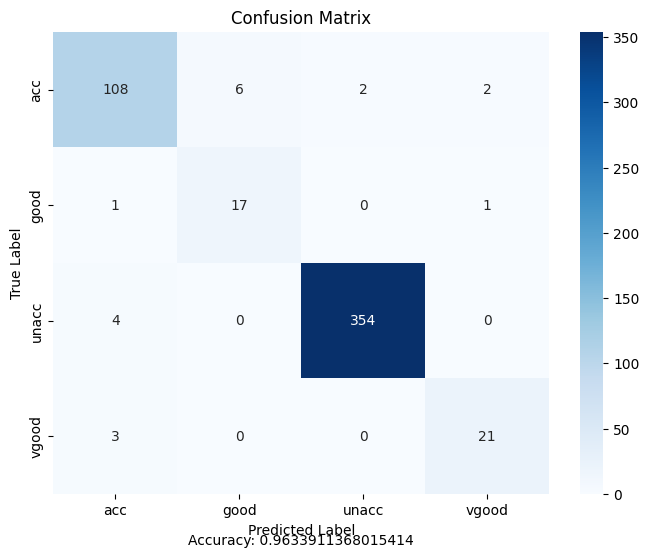

In [27]:
# prompt: Create a Confusion matrix.  Also display the Accuracy value next to the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display accuracy next to the confusion matrix
plt.text(0.5, -0.1, f"Accuracy: {accuracy}", ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

## Find the Most Important Features in the Random Forest Model

In [14]:
# prompt: View the Feature Scores of the Random Forest model


# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importances:")
feature_importance_df


Feature Importances:


,Feature,Importance
5,safety,0.301809
3,persons,0.238916
0,buying,0.163921
1,maint,0.144514
4,lug_boot,0.088666
2,doors,0.062174


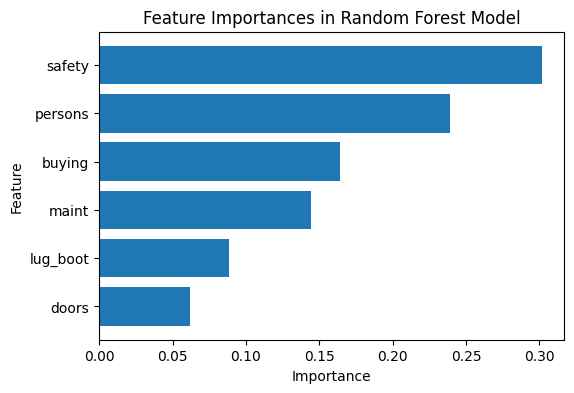

In [16]:
# prompt: Visualize the Feature Importances

import matplotlib.pyplot as plt

# Create a bar plot of feature importances
plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

We notice that safety is the Most Important Feature and doors is the Least Important Feature.

Let us drop the Feature 'doors' and rebuild the model.

In [17]:
# prompt: Drop the column 'doors' and rebuild the Random Forest model.  Display the model accuracy value

# Drop the 'doors' column
x_train = x_train.drop('doors', axis=1)
x_test = x_test.drop('doors', axis=1)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier after dropping 'doors' column: {accuracy}")

Accuracy of the Random Forest Classifier after dropping 'doors' column: 0.9229287090558767


After dropping the Feature 'doors', the Accuracy dropped to 0.922 from 0.963.  Therefore, it is worth retaining all the Features that are present in the dataset.

Therefore, we will revert to the previous model that had all the Features.